In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [3]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Small business loan originations, by county and year
`ffiec.gov-cra_disclosure-d11agg-1.1.1` Last Update: 2020-08-11T22:08:02

_Multi-year CRA disclosures for small business originations, aggregated to county and year_


## Documentation Links

* [Disclosure File Specifications](https://www.ffiec.gov/cra/pdf/17FlatDiscSpecs.pdf) File specifications for the 2017 Disclosure Flat File
* [CRA Data Products](https://www.ffiec.gov/cra/craproducts.htm) 
* [Aggregate & Disclosure Flat Files](https://www.ffiec.gov/cra/craflatfiles.htm) Links to download the files.

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [smb_orig_county](notebooks/Build.ipynb)**. Small business loan originations by county

## References
<ul><li> <strong>cra_d11</string>, <em>metapack+http://library.metatab.org/ffiec.gov-cra_disclosure-d11.csv</em>. Source data, CRA small business originations</li><ul>

In [4]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/ffiec.gov-cra_disclosure-d11-2.1.1.csv')
pkg

# Community Reinvestment Act Disclosure Files, 2010 to 2018
`ffiec.gov-cra_disclosure-d11-2.1.1` Last Update: 2020-08-11T22:20:12

_Multi-year CRA disclosures for small business originations, per county, year and bank._



The [Community Reinvestment Act](https://www.ffiec.gov/cra/default.htm) was enacted by congress in 1997 to encourage investment in underserved communities. The Act requires lenders record and publish data about loans on a per-community basis, specifically, Census tracts and MSAs.  The Disclosure reports record individual lender's loans for MSAs, broken out by loan value and the Median Family income of tracts. 

The [original data releases](https://www.ffiec.gov/cra/craflatfiles.htm) are difficult to use, as each year's disclosures are packages as fixed-width records with all 6 tables in a single file, requiring substantial effort to extract specific record. This data package collects the Small Business Loan origination disclosure records ( D1-1 )  for the years 2010 to 2015, inclusive.
## Documentation Links

* [Disclosure File Specifications](https://www.ffiec.gov/cra/pdf/17FlatDiscSpecs.pdf) File specifications for the 2017 Disclosure Flat File
* [Documentation Page](http://library.metatab.org/ffiec.gov-cra_disclosure-d11-2.1.1/index.html) 
* [CRA Data Products](https://www.ffiec.gov/cra/craproducts.htm) 
* [Aggregate & Disclosure Flat Files](https://www.ffiec.gov/cra/craflatfiles.htm) Links to download the files.

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@sandiegodata.org), [San Diego Regional Data Library](http://sandiegodata.org)

## Resources

* ** [sb_loan_orig](http://library.metatab.org/ffiec.gov-cra_disclosure-d11-2.1.1/data/sb_loan_orig.csv)**. Table D1-1, small business disclosure records, for years 2010 to 2015 inclusive

## References
<ul><li> <strong><a href="https://www.ffiec.gov/cra/xls/18exp_discl.zip">discl_18</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/17exp_discl.zip">discl_17</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/16exp_discl.zip">discl_16</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/15exp_discl.zip">discl_15</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/14exp_discl.zip">discl_14</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/13exp_discl.zip">discl_13</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/12exp_discl.zip">discl_12</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/11exp_discl.zip">discl_11</a></strong>. </li><li> <strong><a href="https://www.ffiec.gov/cra/xls/10exp_discl.zip">discl_10</a></strong>. </li><ul>

In [8]:
# Create Dataframes
df = pkg.resource('sb_loan_orig').dataframe()

In [9]:
from geoid.acs import County

def mkgeoid(r):
    try:
        return str(County(r.state, r.county))
    except ValueError:
        return None

df['geoid'] = df.apply(lambda r: mkgeoid(r), axis=1)

In [10]:
cols = [c for c in df.columns if c.startswith('tot_') or c.startswith('num_')]

t = df.groupby(['year','geoid'])[cols].sum()

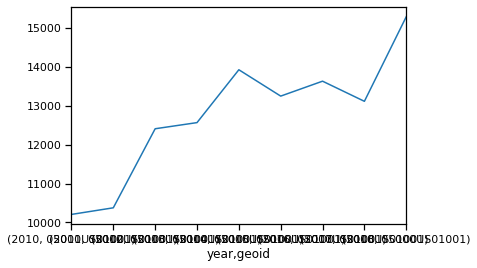

In [16]:
t.loc[(slice(None), '05000US01001'),:].tot_orig_bus_lt100k.plot()